### Study session 9 - more bioinformatics
#### Use data and control structures and pandas dataframes 
#### BIOINF 575 - Fall 2023



___ 
#### RECAP: Pandas dataframes

<img src = "https://media.geeksforgeeks.org/wp-content/uploads/finallpandas.png" width = 550/>

https://www.geeksforgeeks.org/python-pandas-dataframe/

#### How does pandas work?

Pandas is built off of [Numpy](http://www.numpy.org/), and therefore leverages Numpy's C-level speed for its data analysis.

* Numpy can only make data structures of a single type.
* Pandas can use many types. 
* Think of a table, where each column can be whatever type you want it to be, so long as every item in the column is that same type.

#### `pd.DataFrame`

**Multi-dimensional** labeled data structure with columns of *potentially* different types

```python
# Initialization Syntax
df = pd.DataFrame(data, index, columns, dtype)
```

* **`data`** : what is going inside the DataFrame (numpy ndarray (structured or homogeneous), dict, or DataFrame)
* **`index`** : row identifiers (doesn't have to be unique--think foreign key. Defaults to row number)
* **`columns`** : column identifiers
* **`dtype`** : numpy/python based data types

Attributes

['T',
 'at',
 'axes',
 'columns',
 'dtypes',
 'empty',
 'ftypes',
 'iat',
 'iloc',
 'index',
 'ix',
 'loc',
 'ndim',
 'plot',
 'shape',
 'size',
 'style',
 'timetuple',
 'values']

_____
_____

#### Gene expression differential analysis and functional annotation

Read the data from the file `expression_data.txt` into a pandas data frame. The file contains a tab-separated matrix with genes on the rows and samples on the columns.
The data file contains comment lines that start with "#".
Each sample pertains to a group `disease` or `healthy` and the groups are labels are as follows:

```python
    group = ["disease", "healthy", "disease", "disease", "healthy",
             "healthy", "healthy", "disease", "disease", "disease"]
```

------------
  
<b><font color = "red">Exercise</font> <br></b>


Select the genes that have a p-value < 10% on a t-test between the expression in disease and the expression in healthy.  
The t-test is implemented in the scipy library in the stats module (you can use `from scipy import stats`).   
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html    
Keep in mind these are multiple statistical test we are doing so we should correct for multiple comparisons before intepreting/ reading too much into the results.    
https://www.statsmodels.org/dev/generated/statsmodels.stats.multitest.multipletests.html   


In [1]:
# Write your solution here



In [2]:
# import the numpy and pandas libraries to have access to the functionality that it provides
# also import the stats module from the scipy package, we could also use: import scipy.stats

import numpy as np
import pandas as pd
from scipy import stats #or  import scipy.stats

In [3]:
# read the data
# we will use the pandas read_csv function
# we can ignore comment lines setting up the comment attribute to "#" 
# the comment argument is set to the character that a comment line starts with 
# in this case "#", so comment = "#"
# we can set the sep argument to the character used to separate the line elements 
# elements in a line/row are separated by tab, \t, so we set up sep = "\t"

expr_data = pd.read_csv("expression_data.txt", comment = "#", sep = "\t")
expr_data

,Sample1,Sample2,Sample3,Sample4,Sample5,Sample6,Sample7,Sample8,Sample9,Sample10
Gene1,76.85,29.53,7.57,92.21,41.48,7.67,60.84,75.98,66.33,84.45
Gene2,39.45,85.04,77.22,93.47,39.17,98.00,40.12,63.34,70.06,68.69
Gene3,47.17,44.99,8.43,48.17,57.99,42.98,39.36,0.91,10.89,1.53
Gene4,0.60,29.85,93.68,99.83,59.33,66.58,97.36,61.73,38.13,84.76
Gene5,75.00,25.52,18.22,72.14,59.03,40.48,77.92,71.82,89.36,61.75
...,...,...,...,...,...,...,...,...,...,...
Gene96,58.32,88.38,10.11,96.15,32.61,73.66,30.21,90.02,95.41,13.99
Gene97,23.25,77.78,89.51,53.73,21.62,2.21,37.44,47.71,44.60,8.36
Gene98,12.13,85.86,69.77,75.48,35.44,87.63,2.03,42.35,96.95,94.42
Gene99,19.27,25.05,63.26,85.38,75.40,40.22,19.66,77.41,9.74,47.95


In [4]:
# explore the ttest_ind function

# help(stats.ttest_ind)


```
ttest_ind(a, b, axis=0, equal_var=True, nan_policy='propagate', permutations=None, random_state=None, alternative='two-sided', trim=0)
    Calculate the T-test for the means of *two independent* samples of scores.
    
    This is a two-sided test for the null hypothesis that 2 independent samples
    have identical average (expected) values. This test assumes that the
    populations have identical variances by default.
    
    Parameters
    ----------
    a, b : array_like
        The arrays must have the same shape, except in the dimension
        corresponding to `axis` (the first, by default).
    axis : int or None, optional
        Axis along which to compute test. If None, compute over the whole
        arrays, `a`, and `b`.
        
 ... ... ...
    >>> from scipy import stats
    >>> rng = np.random.default_rng()
    
    Test with sample with identical means:
    
    >>> rvs1 = stats.norm.rvs(loc=5, scale=10, size=500, random_state=rng)
    >>> rvs2 = stats.norm.rvs(loc=5, scale=10, size=500, random_state=rng)
    >>> stats.ttest_ind(rvs1, rvs2)
    Ttest_indResult(statistic=-0.4390847099199348, pvalue=0.6606952038870015)
    >>> stats.ttest_ind(rvs1, rvs2, equal_var=False)
    Ttest_indResult(statistic=-0.4390847099199348, pvalue=0.6606952553131064)
    
```

In [5]:
# test the funtion with some made-up data
# a, b : array_like
# we use a list and tuple

stats.ttest_ind(a = [1,2,3], b = (3,5,6))

Ttest_indResult(statistic=-2.529822128134704, pvalue=0.06467689395635302)

In [6]:
# save ttest result into a variable
# the result looks like a tuple and is an instance of (derived from) tuple 
# so we can index

res = stats.ttest_ind(a = [1,2,3], b = (3,5,6))
res[0]

-2.529822128134704

In [7]:
isinstance(res,tuple)

True

In [8]:
# look at the type
type(res)

scipy.stats.stats.Ttest_indResult

In [9]:
# look what the object can do
# same as a tuple -- count and inxed

# dir(res)

```
[ ...
 'count',
 'index',
 'pvalue',
 'statistic']
```

In [10]:
# it also has 2 extra attributes: statistic (t-statistic) and pvalue

res.statistic

-2.529822128134704

In [11]:
res.pvalue

0.06467689395635302

In [12]:
# could we also apply this between two matrices (2x3 arrays)?
m1 = np.arange(1,7).reshape(2,3)
m2 = np.arange(5,11).reshape(2,3)
print("matrix 1")
print(m1)
print("matrix 2") 
print(m2)


matrix 1
[[1 2 3]
 [4 5 6]]
matrix 2
[[ 5  6  7]
 [ 8  9 10]]


In [13]:
# run/call the function with the 2 matrices
# we get 3 statistics and 3 p-values =>
# the test is applied between the respective columns
# this is expected since the first axis, 0, is used by default 

stats.ttest_ind(a = m1, b = m2)

Ttest_indResult(statistic=array([-1.88561808, -1.88561808, -1.88561808]), pvalue=array([0.2, 0.2, 0.2]))

In [14]:
# call the function to apply the test between the respective rows
# set the axis argument, use axis = 1

stats.ttest_ind(a = m1, b = m2, axis = 1)

Ttest_indResult(statistic=array([-4.89897949, -4.89897949]), pvalue=array([0.00804989, 0.00804989]))

In [15]:
# to double check 
# we do the test between the first row from each matrix
# we should get the first statistic and the first p-value
# from the  two present in the previous result

stats.ttest_ind(a = [1,2,3], b = [5,6,7])

Ttest_indResult(statistic=-4.898979485566356, pvalue=0.00804989310083772)

In [16]:
# now that we know that we can apply the test between matrices
# we should create a matrix for healthy and one for disease
# we use the group variable to separate the groups

# set up the group variable
group = ["disease", "healthy", "disease", "disease", "healthy",
         "healthy", "healthy", "disease", "disease", "disease"]

In [17]:
# we cannot do vectorized operations on lists
# the == will compare the list with the string

group == "healthy"

False

In [18]:
# We can make the list an array and use the == to create a 
# logical array that can be used to subset the columns of our data

group_array = np.array(group)
group_array == "healthy"

array([False,  True, False, False,  True,  True,  True, False, False,
       False])

In [19]:
# we use conitional subsetting of the columns for a dataframe 
# .loc[:,condititon]

healthy_expr = expr_data.loc[:, group_array == "healthy"]
disease_expr = expr_data.loc[:, group_array == "disease"]

print("expression in healthy")
print(healthy_expr)
print("expression in disease")
print(disease_expr)

expression in healthy
         Sample2  Sample5  Sample6  Sample7
Gene1      29.53    41.48     7.67    60.84
Gene2      85.04    39.17    98.00    40.12
Gene3      44.99    57.99    42.98    39.36
Gene4      29.85    59.33    66.58    97.36
Gene5      25.52    59.03    40.48    77.92
...          ...      ...      ...      ...
Gene96     88.38    32.61    73.66    30.21
Gene97     77.78    21.62     2.21    37.44
Gene98     85.86    35.44    87.63     2.03
Gene99     25.05    75.40    40.22    19.66
Gene100    76.11    87.45     7.54    69.17

[100 rows x 4 columns]
expression in disease
         Sample1  Sample3  Sample4  Sample8  Sample9  Sample10
Gene1      76.85     7.57    92.21    75.98    66.33     84.45
Gene2      39.45    77.22    93.47    63.34    70.06     68.69
Gene3      47.17     8.43    48.17     0.91    10.89      1.53
Gene4       0.60    93.68    99.83    61.73    38.13     84.76
Gene5      75.00    18.22    72.14    71.82    89.36     61.75
...          ...      ... 

In [20]:
# call the ttest_ind function for the 2 matrices to compute 
# the t-test between the respective rows
# the two rows to not need to have the same number of elements (4 vs 6)

stats.ttest_ind(healthy_expr,disease_expr,1)

Ttest_indResult(statistic=array([-1.80965493e+00, -2.07501694e-01,  2.28218525e+00,  7.08438304e-03,
       -9.09162018e-01,  6.71033778e-01, -4.15915283e-01, -3.54609668e-01,
        9.71890532e-02,  4.24880859e-01,  7.63571680e-01, -6.65329349e-01,
       -5.13004620e-01, -2.16298068e+00, -2.66593067e-01,  4.52822199e-01,
        6.64448319e-01, -9.25013168e-02, -5.05433002e-01,  4.33735296e-01,
        1.13809456e-01, -2.59114704e-02,  1.59213354e+00, -1.77758599e+00,
        1.45282203e+00,  3.89949100e-01,  9.71961632e-01, -5.92065312e-01,
       -1.91904083e+00,  7.14815222e-01,  1.48824407e+00, -1.10217102e+00,
        7.94001166e-01,  1.42410294e+00, -9.66744557e-01, -1.45044000e-01,
        2.83559690e+00,  2.98114568e-01, -3.20359206e-02, -1.89389565e+00,
        3.76696588e-01,  2.51563706e+00, -3.36438018e+00,  1.08330328e+00,
        8.05587009e-01,  1.18753005e+00,  1.19676421e+00,  1.11480007e+00,
       -6.53005252e-02,  6.14577467e-01,  1.65503937e-01,  5.15135640e-01,

In [21]:
# we only need the pvalues
ttest_pvalues = stats.ttest_ind(healthy_expr,disease_expr,1).pvalue
ttest_pvalues

array([0.10794759, 0.84080278, 0.05189402, 0.994521  , 0.38983254,
       0.52109846, 0.68840501, 0.73204816, 0.92496704, 0.68212044,
       0.46704155, 0.52455373, 0.62181016, 0.06249845, 0.7965253 ,
       0.66270496, 0.52508864, 0.92857424, 0.62688299, 0.67593957,
       0.91219319, 0.97996264, 0.1500197 , 0.11336718, 0.18434204,
       0.70675078, 0.35953628, 0.57015689, 0.09125042, 0.49505075,
       0.17500708, 0.30243795, 0.45010296, 0.19223106, 0.36198418,
       0.88826383, 0.02196024, 0.77321152, 0.97522825, 0.09485537,
       0.71619419, 0.03605295, 0.00986746, 0.31024064, 0.4437643 ,
       0.26907914, 0.26565758, 0.29730296, 0.94953705, 0.55590548,
       0.87265328, 0.62038627, 0.79476816, 0.77981433, 0.28036894,
       0.02419917, 0.35867353, 0.99846367, 0.18007715, 0.40415048,
       0.07573936, 0.27077048, 0.33519414, 0.06218927, 0.71984236,
       0.37002126, 0.82239467, 0.16371823, 0.68035153, 0.15296423,
       0.95062396, 0.17624777, 0.31507743, 0.73693796, 0.69510

In [22]:
# we create a pandas Series to have the p-values and the gene symbols together
# the gene symbols are available as the rowlabels (index) for the expr_data dataframe

gene_pvals = pd.Series(data = ttest_pvalues, index = expr_data.index)
gene_pvals

Gene1      0.107948
Gene2      0.840803
Gene3      0.051894
Gene4      0.994521
Gene5      0.389833
             ...   
Gene96     0.854723
Gene97     0.622145
Gene98     0.609314
Gene99     0.590556
Gene100    0.801649
Length: 100, dtype: float64

In [23]:
# Select the genes that have a p-value < 10% on a t-test between the expression in disease and the expression in healthy.
# Conditional subsetting of the series

gene_pvals[gene_pvals < 0.1]

Gene3     0.051894
Gene14    0.062498
Gene29    0.091250
Gene37    0.021960
Gene40    0.094855
Gene42    0.036053
Gene43    0.009867
Gene56    0.024199
Gene61    0.075739
Gene64    0.062189
Gene78    0.008845
dtype: float64

In [24]:
type(group_array)

numpy.ndarray

In [25]:
# get the array of unique elements from a given array
np.unique(group_array)

array(['disease', 'healthy'], dtype='<U7')

In [26]:
# alternative solution - using a function to get a p-value for a row in the expr_data dataframe

def run_ttest(gene_expr, group_vec):
    '''
    Computes the p-value of a t-test between the labels of two groups.
    Args:
    gene_expr (): the expression of a gene in the samples from the two groups
    '''
    gr_unique = np.unique(group_vec)
    # print(gr_unique[0])
    x = gene_expr[group_vec == gr_unique[0]]
    # print(x)
    y = gene_expr[group_vec == gr_unique[1]]
    #print(y)
    return stats.ttest_ind(x, y).pvalue

# test the function with some test data
run_ttest(np.array([2,3,4,5,7, 4,3,6,4,8]), group_array)  



0.6613276773863003

In [27]:
# Apply the function to each row of the dataframe
# call the funtion giving each row one by one as an argument (first argument) and collecting the results in a series
# other arguments can be passed to the applied function by using the name of the argument and providing a value
# e.g.: group_vec = group_array

pv = expr_data.apply(run_ttest, axis = 1, group_vec = group_array)
pv

Gene1      0.107948
Gene2      0.840803
Gene3      0.051894
Gene4      0.994521
Gene5      0.389833
             ...   
Gene96     0.854723
Gene97     0.622145
Gene98     0.609314
Gene99     0.590556
Gene100    0.801649
Length: 100, dtype: float64

In [28]:
# help(expr_data.apply)

```
Help on method apply in module pandas.core.frame:

apply(func: 'AggFuncType', axis: 'Axis' = 0, raw: 'bool' = False, result_type=None, args=(), **kwargs) method of pandas.core.frame.DataFrame instance
    Apply a function along an axis of the DataFrame.
    
    Objects passed to the function are Series objects whose index is
    either the DataFrame's index (``axis=0``) or the DataFrame's columns
    (``axis=1``). By default (``result_type=None``), the final return type
    is inferred from the return type of the applied function. Otherwise,
    it depends on the `result_type` argument.
    
    Parameters
    ----------
    func : function
        Function to apply to each column or row.
    axis : {0 or 'index', 1 or 'columns'}, default 0
        Axis along which the function is applied:
    
        * 0 or 'index': apply function to each column.
        * 1 or 'columns': apply function to each row.
        
... ... ...

   Examples
    --------
    >>> df = pd.DataFrame([[4, 9]] * 3, columns=['A', 'B'])
    >>> df
       A  B
    0  4  9
    1  4  9
    2  4  9
    
    Using a numpy universal function (in this case the same as
    ``np.sqrt(df)``):
    
    >>> df.apply(np.sqrt)
         A    B
    0  2.0  3.0
    1  2.0  3.0
    2  2.0  3.0
    
    Using a reducing function on either axis
    
    >>> df.apply(np.sum, axis=0)
    A    12
    B    27
    dtype: int64
    
    >>> df.apply(np.sum, axis=1)
    0    13
    1    13
    2    13
    dtype: int64

```

In [29]:
# Select the genes that have a p-value < 10% on a t-test between the expression in disease and the expression in healthy.
# Conditional subsetting of the series

pv[pv < 0.1]

Gene3     0.051894
Gene14    0.062498
Gene29    0.091250
Gene37    0.021960
Gene40    0.094855
Gene42    0.036053
Gene43    0.009867
Gene56    0.024199
Gene61    0.075739
Gene64    0.062189
Gene78    0.008845
dtype: float64

___

<b> <font color = "red">Exercise</font></b>

Select the GO (gene ontology) terms for the genes that have a p-value < 10%.   
Gene ontology terms tell us what biological processes, molecular functions, and cellular components the genes are associated with.     
http://geneontology.org/docs/ontology-documentation/   

The file `gene_go.txt` contains that association.   
Note: look for the `.isin' method for a pd.Series.


In [30]:
# Write your solution here



In [31]:
# Select the genes that have a p-value < 10% on a t-test between the expression in disease and the expression in healthy.
pv[pv < 0.1]

Gene3     0.051894
Gene14    0.062498
Gene29    0.091250
Gene37    0.021960
Gene40    0.094855
Gene42    0.036053
Gene43    0.009867
Gene56    0.024199
Gene61    0.075739
Gene64    0.062189
Gene78    0.008845
dtype: float64

In [32]:
# Get only the gene symbols - the index

selected_genes = pv[pv < 0.1].index
selected_genes

Index(['Gene3', 'Gene14', 'Gene29', 'Gene37', 'Gene40', 'Gene42', 'Gene43',
       'Gene56', 'Gene61', 'Gene64', 'Gene78'],
      dtype='object')

In [33]:
# read the data from the file
# index_col=0 allows usto setup the first (index 0) column, in the file as the row lables (dataframe index)

gene_go = pd.read_csv("gene_go.txt", index_col=0)
gene_go

,Gene,GO
0,Gene3,GO66
1,Gene22,GO250
2,Gene74,GO233
3,Gene91,GO489
4,Gene99,GO88
...,...,...
95,Gene65,GO161
96,Gene25,GO102
97,Gene100,GO473
98,Gene68,GO188


In [34]:
# Get the Gene column from the dataframe  
gene_go.Gene

0       Gene3
1      Gene22
2      Gene74
3      Gene91
4      Gene99
       ...   
95     Gene65
96     Gene25
97    Gene100
98     Gene68
99     Gene88
Name: Gene, Length: 100, dtype: object

In [35]:
# for a pandas Series we can use the isin method to check if each 
# of the elements of the Series is in a specific iterable
# it results in a logical Series with True or False for each of the 
# elements in the series

gene_go.Gene.isin(selected_genes)

0      True
1     False
2     False
3     False
4     False
      ...  
95    False
96    False
97    False
98    False
99    False
Name: Gene, Length: 100, dtype: bool

In [36]:
# We use conditional subsetting to get from our gene_go dataframe 
# only the rows that meet the condition
# only the rows where the logical Series has a value of True

gene_go[gene_go.Gene.isin(selected_genes)] 

,Gene,GO
0,Gene3,GO66
20,Gene43,GO218
21,Gene42,GO334
24,Gene64,GO40
36,Gene29,GO429
37,Gene78,GO56
47,Gene40,GO400
57,Gene56,GO162
58,Gene61,GO237
67,Gene37,GO345


In [37]:
# we can also look at only the GO column

gene_go.GO[gene_go.Gene.isin(selected_genes)] # or  
gene_go[gene_go.Gene.isin(selected_genes)].GO


0      GO66
20    GO218
21    GO334
24     GO40
36    GO429
37     GO56
47    GO400
57    GO162
58    GO237
67    GO345
69    GO264
Name: GO, dtype: object

____
____

#### Variant data exploration   
We have variant data for a sample in the file `variant_data_file.vcf`.   
The vcf data file contains information about differences found in the genome of a specific sample when compared to the reference.    
The file contains approximatelly 1000 differences found in the Y chromosome.





..................................................................................................

<b><font color = "red">Exercise</font> <br></b>

<b>Total depth distribution</b>

We want to have a look at the distribution of the total depth in our data (DP key in the INFO column).
- Read the data into a pandas data frame
    - look at the comment and names arguments for the read_csv funtion in the pandas library, you will need to add the header by hand
- Write a function that selects the total depth from the INFO part of a variant (row in our dataframe)
- Apply the function for each row of the dataframe which will result in a pandas series with the total depth for each variant 
- Plot the histogram of total depths (pandas series previously computed)
- Plot the histogram of the total depths that are less than 170

In [38]:
# Write your solution here




In [39]:
# import necessary libraries

import numpy as np
import pandas as pd

In [40]:
# read the data from the vcf file  and add header (column labels)
# pd.read_csv function has a names argument that allows us to set the column labels

columns = ("CHROM", "POS", "ID", "REF", "ALT", "QUAL", "FILTER", "INFO")
vcf_data = pd.read_csv("variant_data_file.vcf", comment = "#", sep = "\t", names = columns)
vcf_data

,CHROM,POS,ID,REF,ALT,QUAL,FILTER,INFO
0,Y,2728456,rs2058276,T,C,32,.,AC=2;AN=2;DB;DP=182;H2;NS=65
1,Y,2734240,.,G,A,31,.,AC=1;AN=2;DP=196;NS=63
2,Y,2743242,.,C,T,25,.,AC=1;AN=2;DP=275;NS=66
3,Y,2746727,.,A,G,34,.,AC=2;AN=2;DP=179;NS=64
4,Y,2777970,.,T,A,67,.,AC=1;AN=2;DP=225;NS=67
...,...,...,...,...,...,...,...,...
954,Y,27108406,rs2049642,G,A,30,.,AC=1;AN=2;DB;DP=163;NS=61
955,Y,27141305,rs9786602,C,A,29,.,AC=2;AN=2;DB;DP=163;NS=63
956,Y,27142489,rs1358368,G,C,37,.,AC=2;AN=2;DB;DP=195;H2;NS=61
957,Y,27182557,.,G,A,22,.,AC=1;AN=2;DP=168;NS=62


In [41]:
# Write a function that return the value for the DP key
# from the INFO part of a variant data row/line 
# The info key=value pairs are separated by ";"
# There might be flag values, that do not have a value
# In that case there is no = in the pair data e.g.: ;DB;

def get_dp(info):
    '''
    Function that returns the total depth value for a variant from the variant information
    Args:
    info (str): the INFO column/element for a variant/data line from a vcf file
    Returns:
    int: the total depth value. for the variant, the value for DP key
    '''
    dp = np.nan
    for pair in info.split(";"):
        if "=" in pair:
            key, val = pair.split("=")
            if key == "DP":
                return int(val)
    return dp

In [42]:
# test the function
get_dp("AC=2;AN=2;DB;DP=182;H2;NS=65")

182

In [43]:
# Use the apply method for a pandas Series (dataframe column)
# to call the funtion for each element in the Series/column
# and collect the result in the resulting Series 
# the resulting series has the same name as the one the function was applied on

dp_data = vcf_data.INFO.apply(get_dp)
dp_data


0      182
1      196
2      275
3      179
4      225
      ... 
954    163
955    163
956    195
957    168
958    317
Name: INFO, Length: 959, dtype: int64

<AxesSubplot:>

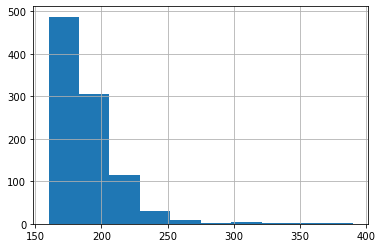

In [44]:
# plot the histogram for a pandas Series using the hist method
# we see a very steep decrese in frequency as the total depth values increase

dp_data.hist()

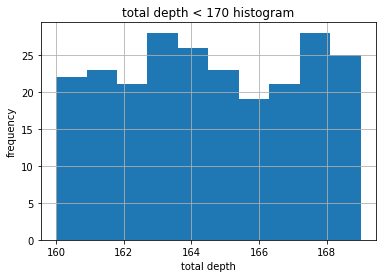

In [45]:
# select only the total depth vaues < 170 using conitional subsetting on the pandas series
# the resulting data structure is still a pandas Series so we can plot the histogram
# usingthe hist method
# we see a close to uniform distribution for depth values < 170
# I also added here a couple of ways we can customize the histogram

hist_plt = dp_data[dp_data<170].hist()
# dir(hist_plt)
hist_plt.set_xlabel("total depth")
hist_plt.set_ylabel("frequency")
title_obj = hist_plt.set_title("total depth < 170 histogram")




..................................................................................................

<b><font color = "red">Exercise</font> <br></b>


<b>Quality and SNP distribution</b> 

<b>A.</b> Display the distribution of the quality scores for the variants. 
- Select the QUAL column from the data and plot the histogram

<b>B.</b> Compute the frequency (number of occurences) of each of the REF ALT combinations available in the dataset and make a bar plot.    
Then, identify the most frequent combination of REF ALT in the dataframe 
- Compute the number of occurences for REF ALT combinations. 
    - Make use of the .value_counts() method for a dataframe to count the number for the unique combinations of row elements.
- The result of value_counts is a pandas series, plot the values using a barplot.
- Select from the series the maximum value together with the associated label: e.g. A T 300

In [46]:
# Write your solution here




<AxesSubplot:>

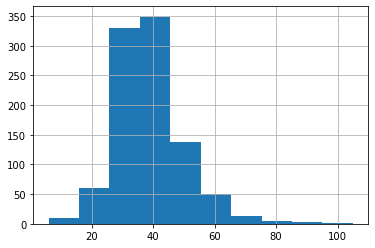

In [47]:
# A. Display the distribution of the quality scores for the variants.
# Select the QUAL column from the data and plot the histogram

vcf_data.QUAL.hist()

In [48]:
# B. Compute the frequency (number of occurences) of each of the REF ALT 
# combinations available in the dataset and make a bar plot.
# Then, identify the most frequent combination of REF ALT in the dataframe

# Compute the number of occurences for REF ALT combinations.
# Make use of the .value_counts() method for a dataframe 
# to count the number for the unique combinations of row elements.


REF_ALT_counts = vcf_data.loc[:,("REF","ALT")].value_counts()
REF_ALT_counts

REF  ALT
C    T      175
G    A      163
A    G      155
T    C      124
C    A       56
G    T       53
C    G       49
G    C       46
T    G       43
     A       35
A    C       34
     T       26
dtype: int64

In [49]:
# we have a series, the row labels look like two columns but they are just row labels
type(REF_ALT_counts)

pandas.core.series.Series

In [50]:
REF_ALT_counts.index

MultiIndex([('C', 'T'),
            ('G', 'A'),
            ('A', 'G'),
            ('T', 'C'),
            ('C', 'A'),
            ('G', 'T'),
            ('C', 'G'),
            ('G', 'C'),
            ('T', 'G'),
            ('T', 'A'),
            ('A', 'C'),
            ('A', 'T')],
           names=['REF', 'ALT'])

<AxesSubplot:xlabel='REF,ALT'>

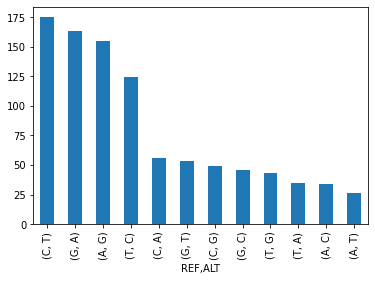

In [51]:
# plot a bar plot with a bar for each value in the series

REF_ALT_counts.plot(kind = "bar")

In [52]:
# Select from the series the maximum value together with the associated label: e.g. A T 300
# get the label and the value from the series where the value is the maximum value
# conitional subsetting

REF_ALT_counts[REF_ALT_counts == max(REF_ALT_counts)]

REF  ALT
C    T      175
dtype: int64

In [53]:
# the data is sorted, descending, so take the first element, to add the label you need a range:

REF_ALT_counts[0:1]

REF  ALT
C    T      175
dtype: int64

In [54]:
REF_ALT_counts[0]

175

_______
### <font color = "red">Exercise</font> 

Explain what the following code does and describe how it computes the result it displays:


In [55]:
def compute_perc(seq):
    return 100*(seq.count("C")+seq.count("G"))/len(seq)

def process_text(text):
    res = 0
    gene = ""
    if text != None:
        gene, promoter_seq = text.split()
        res = compute_perc(promoter_seq)
    return gene, res
        
        
file_name = "gene_promoter_sequence.txt"       
with open(file = file_name, mode = "r") as promoter_seq_file:
    for line in promoter_seq_file:
        res = process_text(line)
        print("gene", res[0], "percentage", res[1])


gene BRCA2 percentage 52.666666666666664
gene EGFR percentage 67.33333333333333
gene TP53 percentage 43.333333333333336
gene TNF percentage 57.166666666666664


In [56]:
## Write your code description here



- The function compute_perc computes the GC content (percentage of G and C bases) for a given sequence (seq)
    - it uses the function count for a string (the sequence) to count the number of "C" occurences and does the same for "G" occurences then it adds them up and divides them by the sequence length (computed using the len function) and multiplies the ratio by 100
    - returns the computed percentage
    
    
- The function process_text processes a given string, it assumes the string contains a gene symbol and a sequence separated by a whitespace (e.g. tab, \t) and it computes the GC content for the sequence and returns a tuple with the gene and the GC content
    - it initializes a res variable with 0 and a gene variable with an empty string
    - it checks if the given text is None
        - if it is not, 
            - it splits the text by whitespace and unpacks the resulting list into a gene and a promoter sequence
            - it uses compute_perc function to compute the GC content for the sequence (promoter_seq) and assigns the resulting value to the res variable
            - returns a tuple of the gene and the GC content stored in the res variable
            
            
- The code in the last part of the cell assigns to a variable file_name the text: "gene_promoter_sequence.txt" 
    - it then uses the with operator and the open function to open the file for writing ("w")
    - uses a for loop to go through the lines in the file and for each line
        - it uses the process text funtion to compute the tuple of gene symbol and GC content and assigns it to the variable res
        - it prints the text "gene \<gene symbol> percentage \<GC content>" using indexing on the tuple stored in res
            